# FACEBOOK LINK PREDICTION USING GRAPH MINING 
# DATA: https://www.kaggle.com/c/FacebookRecruiting


In [3]:
### import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report
import seaborn as sns
import networkx as nx
import pickle , os
import warnings 
warnings.filterwarnings('ignore')



In [2]:
### read data using networkx
traindata = pd.read_csv('train.csv')

traindata.to_csv('train_new.csv', header = False , index = False)
g = nx.read_edgelist('train_new.csv' , delimiter = ',', create_using = nx.DiGraph(), nodetype = int)
nx.info(g)

'Name: \nType: DiGraph\nNumber of nodes: 1862220\nNumber of edges: 9437519\nAverage in degree:   5.0679\nAverage out degree:   5.0679'

In [3]:
### read subgraphs by reading sample data
sample = pd.read_csv('train.csv' , nrows = 100).to_csv('sampledata.csv',header = False , index = False)
subg = nx.read_edgelist('sampledata.csv', delimiter = ',', create_using = nx.DiGraph(), nodetype = int)
pos = nx.spring_layout(subg)


Name: 
Type: DiGraph
Number of nodes: 122
Number of edges: 100
Average in degree:   0.8197
Average out degree:   0.8197


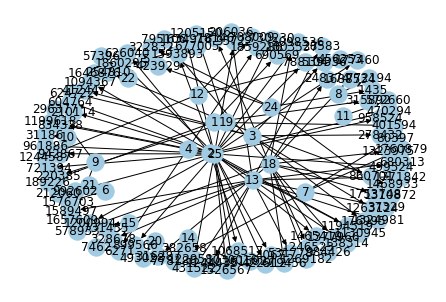

In [4]:
### visualize subgraph
nx.draw(subg, pos , node_color = '#A0CBE2', egde_color = '#00bb5e' , edge_cmap = plt.cm.Blues, with_labels = True)
print(nx.info(subg))

In [ ]:
### EDA
### no.of of distinct persons or nodes
len(g.nodes())

1862220

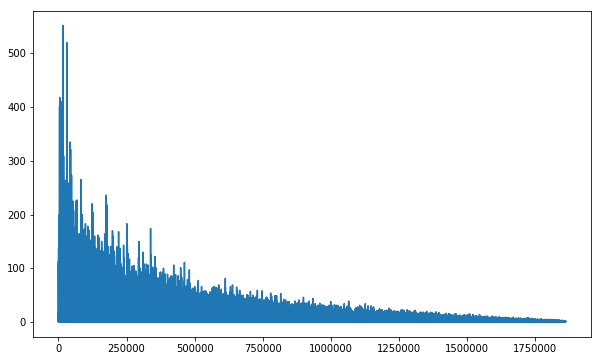

In [ ]:
### no.of followers and for each person/node and no. of people single person is following 
indegree = list(dict(g.in_degree()).values())
outdegree = list(dict(g.out_degree()).values())
plt.figure(figsize=(10,6))

plt.plot(indegree)



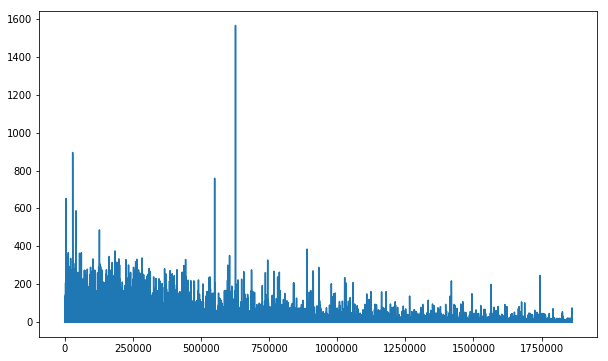

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(outdegree)

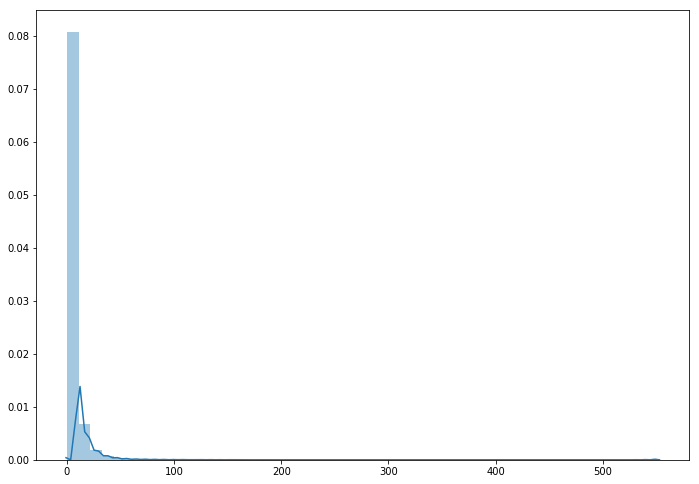

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(indegree)

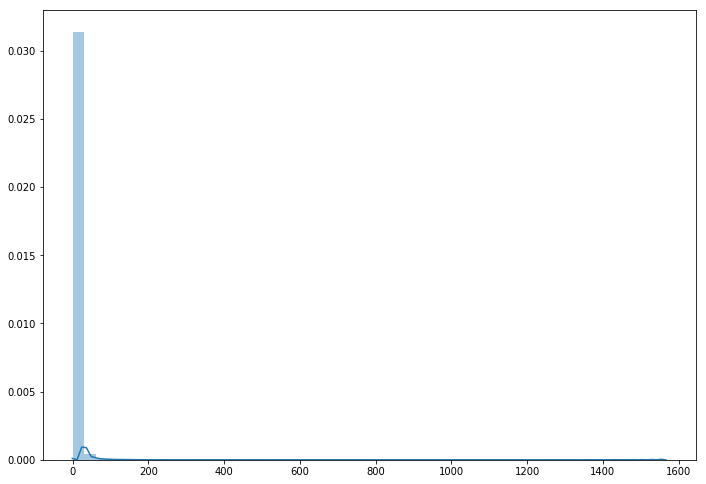

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(outdegree)

In [ ]:
#### persons/nodes who are not following anyone
sum(np.array(outdegree) ==0)

274512

In [ ]:
### people with zero followers
sum(np.array(indegree)==0)

188043

In [ ]:
## people with no followers and not following anyone

cnt = 0
for i in g.nodes():
    if len(list(g.predecessors(i)))==0:
        if len(list(g.successors(i)))==0:
            cnt +=1
print(cnt)

0


In [ ]:
### so every one is getting socialized 

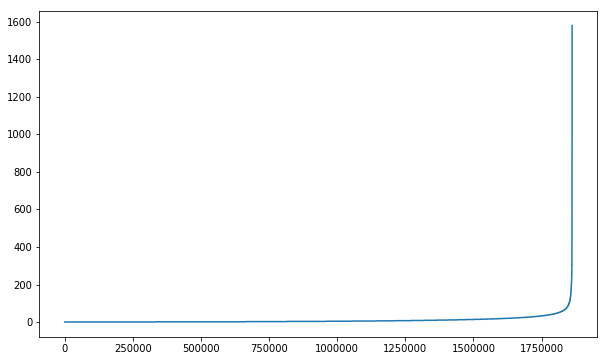

In [ ]:
##### now lets look at both followers and followees together
from collections import Counter
in_dict = dict(g.in_degree())
out_dict = dict(g.out_degree())
d = Counter(in_dict) + Counter(out_dict)
plt.figure(figsize=(10,6))

plt.plot(sorted(np.array(list(d.values()))))


In [ ]:
### lets look at min and max no of followers and followees
print(np.array(list(d.values())).min() , '\n')
print(np.array(list(d.values())).max())

1 

1579


In [ ]:
### weakly connected nodes/graphs components
len(list(nx.weakly_connected_components(g)))

45558

In [1]:
### lets create bad edges whose shortest path is > 2 ,  for making it as a supervised learning algorithm

import random
import csv
data = csv.reader(open('train_new.csv', 'r'))
edges = {}
for edge in data:
    edges[(edge[0], edge[1])]=1

missing_edges = set([])
while (len(missing_edges) < 9437519):  ### total train data
    a = random.randint(1, 1862220) ### genertaing random edges
    b = random.randint(1, 1862220)
    tmp = edges.get((a,b), -1)
    if tmp == -1 and a!=b:
        try :
            if nx.shortest_path_length(g, source=a, target=b) >2: ### shortest pathe greater than 2
                missing_edges.add((a,b))
            else:
                continue
        except:
            missing_edges.add((a,b))
    else:
        continue
    
print(len(missing_edges))
    

9437519


In [4]:
## split data into train and test sets

pos_data = pd.read_csv('train.csv') 
neg_data = pd.DataFrame(list(missing_edges), columns = ['source_node', 'destination_node'])
### test and train split randomly 
X_train_pos , X_test_pos, y_train_pos , y_test_pos = train_test_split(pos_data, np.ones(len(pos_data)), test_size = 0.2, random_state = 9)

X_train_neg , X_test_neg , y_train_neg, y_test_neg = train_test_split(neg_data, np.zeros(len(neg_data)), test_size = 0.2, random_state = 9)

## remove headers and save the data to disk

X_train_pos.to_csv('train_pos.csv', header = False, index = False)
X_test_pos.to_csv('test_pos.csv', header = False, index = False)
X_train_neg.to_csv('train_neg.csv', header = False, index = False)
X_test_neg.to_csv('test_neg.csv', header = False, index = False)



In [5]:
train_graph=nx.read_edgelist('train_pos.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
test_graph=nx.read_edgelist('test_pos.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
print(nx.info(train_graph))
print(nx.info(test_graph))

# finding the unique nodes in the both train and test graphs
train_nodes_pos = set(train_graph.nodes())
test_nodes_pos = set(test_graph.nodes())

trY_teY = len(train_nodes_pos.intersection(test_nodes_pos))
trY_teN = len(train_nodes_pos - test_nodes_pos)
teY_trN = len(test_nodes_pos - train_nodes_pos)

print('no of people common in train and test -- ',trY_teY)
print('no of people present in train but not present in test -- ',trY_teN)

print('no of people present in test but not present in train -- ',teY_trN)
print(' % of people not there in Train but exist in Test in total Test data are {} %'.format(teY_trN/len(test_nodes_pos)*100))

Name: 
Type: DiGraph
Number of nodes: 1780722
Number of edges: 7550015
Average in degree:   4.2399
Average out degree:   4.2399
Name: 
Type: DiGraph
Number of nodes: 1144623
Number of edges: 1887504
Average in degree:   1.6490
Average out degree:   1.6490
no of people common in train and test --  1063125
no of people present in train but not present in test --  717597
no of people present in test but not present in train --  81498
 % of people not there in Train but exist in Test in total Test data are 7.1200735962845405 %


# we have a cold start problem , which is data present in test data but not there in train data

In [6]:
## final train test split 
X_train_pos = pd.read_csv('train_pos.csv', names = ['source_node','destination_node'])
X_test_pos = pd.read_csv('test_pos.csv', names = ['source_node','destination_node'])
X_train_neg = pd.read_csv('train_neg.csv', names = ['source_node','destination_node'])
X_test_neg = pd.read_csv('test_neg.csv', names = ['source_node','destination_node'])

X_train = X_train_pos.append(X_train_neg,ignore_index=True)
y_train = np.concatenate((y_train_pos,y_train_neg))
X_test = X_test_pos.append(X_test_neg,ignore_index=True)
y_test = np.concatenate((y_test_pos,y_test_neg)) 

X_train.to_csv('train_after_eda.csv',header=False,index=False)
X_test.to_csv('test_after_eda.csv',header=False,index=False)
pd.DataFrame(y_train.astype(int)).to_csv('train_y.csv',header=False,index=False)
pd.DataFrame(y_test.astype(int)).to_csv('test_y.csv',header=False,index=False)

In [7]:
%%time
print("Data points in train data",X_train.shape)
print("Data points in test data",X_test.shape)
print("Shape of traget variable in train",y_train.shape)
print("Shape of traget variable in test", y_test.shape)

Data points in train data (15100030, 2)
Data points in test data (3775008, 2)
Shape of traget variable in train (15100030,)
Shape of traget variable in test (3775008,)
CPU times: user 322 µs, sys: 164 µs, total: 486 µs
Wall time: 400 µs


# FEATURE ENGINEERING


In [8]:
train_graph = nx.read_edgelist('train_after_eda.csv', delimiter=',', create_using=nx.DiGraph(), nodetype = int)
print(nx.info(train_graph))

Name: 
Type: DiGraph
Number of nodes: 1862198
Number of edges: 15100011
Average in degree:   8.1087
Average out degree:   8.1087


In [9]:
%%time
## graph similarity measures
## compute Jaccard distance
## for followees and followers

#for followees
def jaccard_for_followees(a,b):
    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
            return 0
        sim = (len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b)))))/\
                                    (len(set(train_graph.successors(a)).union(set(train_graph.successors(b)))))
    except:
        return 0
    return sim
                      
print(jaccard_for_followees(273084,1505602))

def jaccard_for_followers(a,b):
    try:
        if len(set(train_graph.predecessors(a))) == 0  | len(set(g.predecessors(b))) == 0:
            return 0
        sim = (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b)))))/\
                                 (len(set(train_graph.predecessors(a)).union(set(train_graph.predecessors(b)))))
        return sim
    except:
        return 0 

print(jaccard_for_followers(273084,470294))



0.0
0
CPU times: user 1.19 ms, sys: 7.57 ms, total: 8.76 ms
Wall time: 20 ms


In [10]:
%%time
### cosine distance
import math

def cosine_for_followees(a,b):
    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
            return 0
        sim = (len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b)))))/\
                                    (math.sqrt(len(set(train_graph.successors(a)))*len((set(train_graph.successors(b))))))
        return sim
    except:
        return 0
    
def cosine_for_followers(a,b):
    try:
        
        if len(set(train_graph.predecessors(a))) == 0  | len(set(train_graph.predecessors(b))) == 0:
            return 0
        sim = (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b)))))/\
                                     (math.sqrt(len(set(train_graph.predecessors(a))))*(len(set(train_graph.predecessors(b)))))
        return sim
    except:
        return 0 
    
print(cosine_for_followees(273084,1505602))
print(cosine_for_followers(2,470294))

                   

0.0
0.015118578920369087
CPU times: user 577 µs, sys: 3.61 ms, total: 4.18 ms
Wall time: 6.19 ms


# RANKING MEASURES


In [11]:
%%time
## page rank

if not os.path.isfile('page_rank.p'):
    pr = nx.pagerank(train_graph, alpha=0.85)
    pickle.dump(pr,open('page_rank.p','wb'))
else:
    pr = pickle.load(open('page_rank.p','rb'))

CPU times: user 515 ms, sys: 324 ms, total: 840 ms
Wall time: 1.16 s


In [12]:
print('min',pr[min(pr, key=pr.get)])
print('max',pr[max(pr, key=pr.get)])
print('mean',float(sum(pr.values())) / len(pr))

min 8.217150960101353e-08
max 1.2019474524963624e-05
mean 5.36998959832734e-07


In [13]:
%%time
## shortest path between two nodes , if already node exist remove and calculate 

def compute_shortest_path(a,b):
    p=-1
    try:
        if train_graph.has_edge(a,b):
            train_graph.remove_edge(a,b)
            p = nx.shortest_path_length(train_graph, source = a, target = b)
            train_graph.add_edge(a,b)
        else:
            p = nx.shortest_path_length(train_graph, source = a, target = b)
        return p
    except:
        return -1
print(compute_shortest_path(77697, 826021))

print(compute_shortest_path(669354,1635354))
  

7
8
CPU times: user 73 ms, sys: 852 ms, total: 925 ms
Wall time: 2.98 s


In [14]:
##  is person following back

def follows_back(a,b):
    if train_graph.has_edge(b,a):
        return 1
    else:
        return 0
print(follows_back(1,189226))
print(follows_back(669354,1635354))

1
0


In [15]:
# ADAR INDEX

# Adamic/Adar measures is defined as inverted sum of degrees of common neighbours for given two vertices.

def calc_adar_in(a,b):
    sum=0
    try:
        n=list(set(train_graph.successors(a)).intersection(set(train_graph.successors(b))))
        if len(n)!=0:
            for i in n:
                sum=sum+(1/np.log10(len(list(train_graph.predecessors(i)))))
            return sum
        else:
            return 0
    except:

        return 0
    
calc_adar_in(1,189226)


0

In [16]:
%%time
## weakly connected components
wcc = list(nx.weakly_connected_components(train_graph))

def belongs_to_same_wcc(a,b):
    idx = []
    if train_graph.has_edge(b,a):
        return 1
    if train_graph.has_edge(a,b):
        for i in wcc:
            if a in i :
                idx = i
                break
        if (b in idx):
            train_graph.remove_edge(a,b)
            if compute_shortest_path(a,b)==-1:
                train_graph.add_edge(a,b)
                return 0
            else:
                train_graph.has_edge(a,b)
                return 1
        else:
            return 0
    else:
        for i in wcc:
            if a in i:
                idx = i
                break
        if (b in idx):
            return 1
        else:
            return 0

print(belongs_to_same_wcc(861, 1659750))

1
CPU times: user 59.6 s, sys: 2min 48s, total: 3min 48s
Wall time: 6min 45s


In [ ]:
# # HITS SCORE

# if not os.path.isfile('hits.p'):
#     hits= nx.hits(train_graph, max_iter=100,tol = 1e-08,nstart = None, normalized = True )
#     pickle.dump(hits, open('hits.p', 'wb'))
# else:
#     hits = pickle.load(open('hits.p','rb'))
    
    

In [17]:
%%time
import random
if os.path.isfile('train_after_eda.csv'):
    filename= 'train_after_eda.csv'
    n_train = sum(1 for line in open(filename))
    ## sample size
    s = 100000
    skip_train = sorted(random.sample(range(1,n_train+1), n_train-s))
                        

CPU times: user 36.2 s, sys: 3.72 s, total: 39.9 s
Wall time: 46.4 s


In [18]:
%%time
if os.path.isfile('train_after_eda.csv'):
    filename = 'test_after_eda.csv'
    n_test = sum(1 for line in open(filename))
    s= 50000
    skip_test = sorted(random.sample(range(1,n_test+1), n_test-s))

CPU times: user 8.75 s, sys: 632 ms, total: 9.39 s
Wall time: 11.8 s


In [19]:
print("Number of rows in the train data file:", n_train)
print("Number of rows we are going to elimiate in train data are",len(skip_train))
print("Number of rows in the test data file:", n_test)
print("Number of rows we are going to elimiate in test data are",len(skip_test))

Number of rows in the train data file: 15100030
Number of rows we are going to elimiate in train data are 15000030
Number of rows in the test data file: 3775008
Number of rows we are going to elimiate in test data are 3725008


In [20]:
df_final_train = pd.read_csv('train_after_eda.csv', skiprows = skip_train, names = ['source_node','destination_node'])

df_final_train['indicator_link'] = pd.read_csv('train_y.csv', skiprows = skip_train , names = ['indicator_link'])

df_final_train.head()


,source_node,destination_node,indicator_link
0,273084,1505602,1
1,1431257,671321,1
2,944692,559417,1
3,203054,849904,1
4,1825888,356016,1


In [21]:
df_final_test = pd.read_csv('test_after_eda.csv', skiprows = skip_test, names = ['source_node','destination_node'])

df_final_test['indicator_link'] = pd.read_csv('test_y.csv', skiprows = skip_test , names = ['indicator_link'])

df_final_test.head()

,source_node,destination_node,indicator_link
0,848424,784690,1
1,278857,1309723,1
2,1356689,408566,1
3,1073318,1188723,1
4,859208,1198380,1


In [22]:
print(df_final_train.shape, '\n')
print(df_final_test.shape)

(100001, 3) 

(50001, 3)


In [25]:
%%time
# ADDING FEATURES TO THE FINAL DATAFRAME

## jaccard distance features
df_final_train['jaccard_followers'] = df_final_train.apply(lambda row: jaccard_for_followers(row['source_node'], row['destination_node']), axis=1)
df_final_test['jaccard_followers'] = df_final_test.apply(lambda row : jaccard_for_followers(row['source_node'], row['destination_node']), axis=1)

df_final_train['jaccard_followees'] = df_final_train.apply(lambda row: jaccard_for_followees(row['source_node'], row['destination_node']), axis=1)
df_final_test['jaccard_followees'] = df_final_test.apply(lambda row : jaccard_for_followees(row['source_node'], row['destination_node']), axis=1)
## cosine distance features

df_final_train['cosine_followers'] = df_final_train.apply(lambda row: cosine_for_followers(row['source_node'], row['destination_node']), axis=1)
df_final_test['cosine_followers'] = df_final_test.apply(lambda row : cosine_for_followers(row['source_node'], row['destination_node']), axis=1)

df_final_train['cosine_followees'] = df_final_train.apply(lambda row: cosine_for_followees(row['source_node'], row['destination_node']), axis=1)
df_final_test['cosine_followees'] = df_final_test.apply(lambda row : cosine_for_followees(row['source_node'], row['destination_node']), axis=1)

    
    

CPU times: user 43.4 s, sys: 19.1 s, total: 1min 2s
Wall time: 1min 47s


In [26]:
### fucntion to calculate no.of followees and foolowers for source and destination nodes

def compute_features(df_final):
    num_followers_source = []
    num_followees_source = []
    num_followers_destination = []
    num_followees_destinations = []
    inter_followers = []
    inter_followees = []
    for i, row in df_final.iterrows():
        try:
            s1 = set(train_graph.predecessors(row['source_node']))
            s2 =set(train_graph.successors(row['source_node']))
        except:
            s1 = set()
            s2 =set()
        try:
            d1 = set(train_graph.predecessors(row['destination_node']))
            d2 = set(train_graph.successors(row['destination_node']))
        except:
            d1 = set()
            d2 = set()
        num_followers_source.append(len(s1))
        num_followees_source.append(len(s2))
        
        num_followers_destination.append(len(d1))
        num_followees_destinations.append(len(d2))
        
        inter_followers.append(len(s1.intersection(d1)))
        inter_followees.append(len(s2.intersection(d2)))
        
    return num_followers_source, num_followers_destination , num_followees_source, num_followees_destinations, inter_followers, inter_followees

        


In [27]:
%%time
## compute train features
df_final_train['num_followers_source'], df_final_train['num_followers_destination'],\
df_final_train['num_followees_source'] , df_final_train['num_followees_destinations'],\
df_final_train['inter_followers'], df_final_train['inter_followees'] =compute_features(df_final_train)

# compute test features
df_final_test['num_followers_source'], df_final_test['num_followers_destination'],\
df_final_test['num_followees_source'] , df_final_test['num_followees_destinations'],\
df_final_test['inter_followers'], df_final_test['inter_followees'] =compute_features(df_final_test)
    


CPU times: user 22.9 s, sys: 1.28 s, total: 24.1 s
Wall time: 27 s


In [28]:
%%time
## adding ADAR, Following back , weakly connected components , shortest_path features

df_final_train['adar_index'] = df_final_train.apply(lambda row : calc_adar_in(row['source_node'], row['destination_node']), axis = 1)
df_final_test['adar_index'] = df_final_test.apply(lambda row: calc_adar_in(row['source_node'],row['destination_node']),axis=1)

#mapping followback fucntion to dataframe
df_final_train['follows_back'] = df_final_train.apply(lambda row: follows_back(row['source_node'],row['destination_node']),axis=1)

df_final_test['follows_back'] = df_final_test.apply(lambda row: follows_back(row['source_node'],row['destination_node']),axis=1)

#mapping same component of wcc or not 
df_final_train['same_comp'] = df_final_train.apply(lambda row: belongs_to_same_wcc(row['source_node'],row['destination_node']),axis=1)
df_final_test['same_comp'] = df_final_test.apply(lambda row: belongs_to_same_wcc(row['source_node'],row['destination_node']),axis=1)

#mapping shortest path 
df_final_train['shortest_path'] = df_final_train.apply(lambda row: compute_shortest_path(row['source_node'],row['destination_node']),axis=1)
df_final_test['shortest_path'] = df_final_test.apply(lambda row: compute_shortest_path(row['source_node'],row['destination_node']),axis=1)

CPU times: user 6min 33s, sys: 2min 33s, total: 9min 7s
Wall time: 13min 34s


In [29]:
from tqdm import tqdm
Weight_in , Weight_out = {} , {}
for i in  tqdm(train_graph.nodes()):
    s1=set(train_graph.predecessors(i))
    w_in = 1.0/(np.sqrt(1+len(s1)))
    Weight_in[i]=w_in
    
    s2=set(train_graph.successors(i))
    w_out = 1.0/(np.sqrt(1+len(s2)))
    Weight_out[i]=w_out
    
#for imputing with mean
mean_weight_in = np.mean(list(Weight_in.values()))
mean_weight_out = np.mean(list(Weight_out.values()))

100%|██████████| 1862198/1862198 [01:21<00:00, 22884.97it/s]


In [30]:
%%time
#mapping to pandas train
df_final_train['weight_in'] = df_final_train.destination_node.apply(lambda x: Weight_in.get(x,mean_weight_in))
df_final_train['weight_out'] = df_final_train.source_node.apply(lambda x: Weight_out.get(x,mean_weight_out))

#mapping to pandas test
df_final_test['weight_in'] = df_final_test.destination_node.apply(lambda x: Weight_in.get(x,mean_weight_in))
df_final_test['weight_out'] = df_final_test.source_node.apply(lambda x: Weight_out.get(x,mean_weight_out))


#some features engineerings on the in and out weights
df_final_train['weight_f1'] = df_final_train.weight_in + df_final_train.weight_out
df_final_train['weight_f2'] = df_final_train.weight_in * df_final_train.weight_out
df_final_train['weight_f3'] = (2*df_final_train.weight_in + 1*df_final_train.weight_out)
df_final_train['weight_f4'] = (1*df_final_train.weight_in + 2*df_final_train.weight_out)

#some features engineerings on the in and out weights
df_final_test['weight_f1'] = df_final_test.weight_in + df_final_test.weight_out
df_final_test['weight_f2'] = df_final_test.weight_in * df_final_test.weight_out
df_final_test['weight_f3'] = (2*df_final_test.weight_in + 1*df_final_test.weight_out)
df_final_test['weight_f4'] = (1*df_final_test.weight_in + 2*df_final_test.weight_out)

CPU times: user 556 ms, sys: 1.48 s, total: 2.03 s
Wall time: 4.35 s


In [31]:
%%time
#page rank for source and destination in Train and Test
#if anything not there in train graph then adding mean page rank 
mean_pr = float(sum(pr.values())) / len(pr)

df_final_train['page_rank_s'] = df_final_train.source_node.apply(lambda x:pr.get(x,mean_pr))
df_final_train['page_rank_d'] = df_final_train.destination_node.apply(lambda x:pr.get(x,mean_pr))

df_final_test['page_rank_s'] = df_final_test.source_node.apply(lambda x:pr.get(x,mean_pr))
df_final_test['page_rank_d'] = df_final_test.destination_node.apply(lambda x:pr.get(x,mean_pr))

CPU times: user 486 ms, sys: 711 ms, total: 1.2 s
Wall time: 2.19 s


In [32]:
%%time
# SVD features for source and destination nodes
from scipy.sparse.linalg import svds, eigs

def svd(x,S):
    try:
        z =sadj_dict[x]
        return S[z]
    except:
        return [0,0,0,0,0,0]


CPU times: user 294 µs, sys: 1.46 ms, total: 1.75 ms
Wall time: 4.35 ms


In [33]:
%%time
### get feature matrices for SVD

sadj_col = sorted(train_graph.nodes())
sadj_dict = {val:idx for idx , val in enumerate(sadj_col)}


CPU times: user 1.95 s, sys: 2.69 s, total: 4.65 s
Wall time: 10.1 s


In [34]:
%%time
adj = nx.adjacency_matrix(train_graph, nodelist =sorted(train_graph.nodes())).asfptype()


CPU times: user 7min 33s, sys: 34min 49s, total: 42min 22s
Wall time: 1h 18min 37s


In [35]:
%%time
U, s , V = svds(adj, k=6)
print('Adjacency matrix Shape',adj.shape)
print('U Shape',U.shape)
print('V Shape',V.shape)
print('s Shape',s.shape)

Adjacency matrix Shape (1862198, 1862198)
U Shape (1862198, 6)
V Shape (6, 1862198)
s Shape (6,)
CPU times: user 52.9 s, sys: 2.39 s, total: 55.3 s
Wall time: 42.5 s


In [36]:
%%time
## compute SVD features for train and test dataframes for both source and destination nodes

df_final_train[['svd_u_s_1', 'svd_u_s_2','svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6']] = \
df_final_train.source_node.apply(lambda x: svd(x, U)).apply(pd.Series)

df_final_train[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5','svd_u_d_6']] = \
df_final_train.destination_node.apply(lambda x: svd(x, U)).apply(pd.Series)

df_final_train[['svd_v_s_1','svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6',]] = \
df_final_train.source_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)

df_final_train[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5','svd_v_d_6']] = \
df_final_train.destination_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)

df_final_test[['svd_u_s_1', 'svd_u_s_2','svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6']] = \
df_final_test.source_node.apply(lambda x: svd(x, U)).apply(pd.Series)

df_final_test[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5','svd_u_d_6']] = \
df_final_test.destination_node.apply(lambda x: svd(x, U)).apply(pd.Series)

##### 
df_final_test[['svd_v_s_1','svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6',]] = \
df_final_test.source_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)

df_final_test[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5','svd_v_d_6']] = \
df_final_test.destination_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)

CPU times: user 6min 40s, sys: 16min 3s, total: 22min 43s
Wall time: 40min 34s


In [37]:
%%time
df_final_train.to_csv('df_final_train.csv')
df_final_test.to_csv('df_final_test.csv')

CPU times: user 14.6 s, sys: 807 ms, total: 15.4 s
Wall time: 18.1 s


In [38]:
print(df_final_train.head(),df_final_train.shape,'\n')
print(df_final_test.head(), df_final_test.shape)

   source_node  destination_node  indicator_link  jaccard_followers  \
0       273084           1505602               1                  0   
1      1431257            671321               1                  0   
2       944692            559417               1                  0   
3       203054            849904               1                  0   
4      1825888            356016               1                  0   

   jaccard_followees  cosine_followers  cosine_followees  \
0           0.000000          0.000000          0.000000   
1           0.000000          0.089087          0.000000   
2           0.000000          0.000000          0.000000   
3           0.071429          0.000000          0.136083   
4           0.150000          0.133631          0.273861   

   num_followers_source  num_followers_destination  num_followees_source  ...  \
0                    14                         15                    22  ...   
1                    14                         15

In [39]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [41]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'], axis=1, inplace = True)


In [42]:
df_final_test.drop(['source_node', 'destination_node','indicator_link'], axis=1, inplace = True)


In [43]:
print(df_final_train.columns,'\n')
print(df_final_test.columns)

Index(['jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_source', 'num_followers_destination',
       'num_followees_source', 'num_followees_destinations', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'svd_u_s_1',
       'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6',
       'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5',
       'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4',
       'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3',
       'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object') 

Index(['jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_source', 'num_followers_destination',
       'num_followees_source', 'num_follo

In [45]:
# MODELLING
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

Estimators =  10 Train Score 0.9159608427324962 test Score 0.9179708236892956
Estimators =  50 Train Score 0.9180698455622927 test Score 0.919322835310508
Estimators =  100 Train Score 0.9239863793066982 test Score 0.9252691576947435
Estimators =  250 Train Score 0.9217712957091523 test Score 0.9232489923396713
Estimators =  450 Train Score 0.9226275518303331 test Score 0.9243022838189001
CPU times: user 2min 42s, sys: 2.12 s, total: 2min 44s
Wall time: 52.9 s


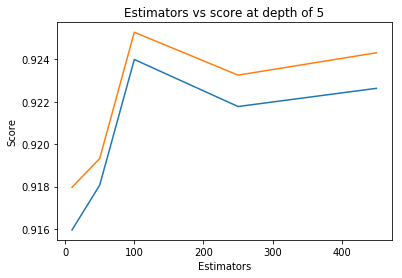

In [46]:
%%time
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.9070990076655953 test Score 0.9030171019431086
depth =  9 Train Score 0.9294749390752092 test Score 0.9301248447335734
depth =  11 Train Score 0.929650045407506 test Score 0.9302746882372767
depth =  15 Train Score 0.9297606604799459 test Score 0.9300503401647112
depth =  20 Train Score 0.9298491868331346 test Score 0.9300915693084938
depth =  35 Train Score 0.9299523025621544 test Score 0.9302208095649062
depth =  50 Train Score 0.9299635941539598 test Score 0.930198290742222
depth =  70 Train Score 0.9299635941539598 test Score 0.930198290742222
depth =  130 Train Score 0.9299635941539598 test Score 0.930198290742222


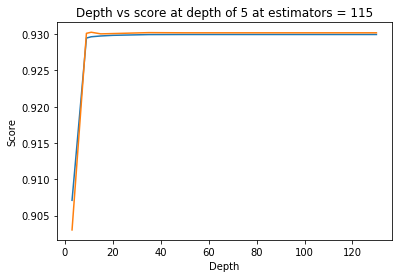

CPU times: user 5min 52s, sys: 4.16 s, total: 5min 56s
Wall time: 2min 1s


In [47]:
%%time
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [48]:
%%time
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.92923961 0.9294803  0.92900161 0.92914608 0.92940662]


KeyError: 'mean_train_score'

In [49]:
print(rf_random.best_estimator_)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=33, min_samples_split=138,
                       min_weight_fraction_leaf=0.0, n_estimators=109,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)


In [50]:
%%time
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=33, min_samples_split=138,
            min_weight_fraction_leaf=0.0, n_estimators=109, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

CPU times: user 43 µs, sys: 1 µs, total: 44 µs
Wall time: 48.9 µs


In [51]:
%%time
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

CPU times: user 34.4 s, sys: 398 ms, total: 34.8 s
Wall time: 12.1 s


In [52]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.930198662906752
Test f1 score 0.9303688092729189


In [53]:
%%time
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

CPU times: user 11 µs, sys: 1e+03 ns, total: 12 µs
Wall time: 14.8 µs


Train confusion_matrix


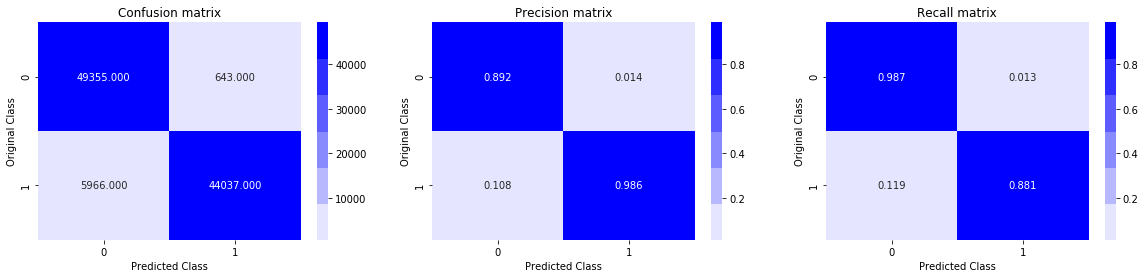

Test confusion_matrix


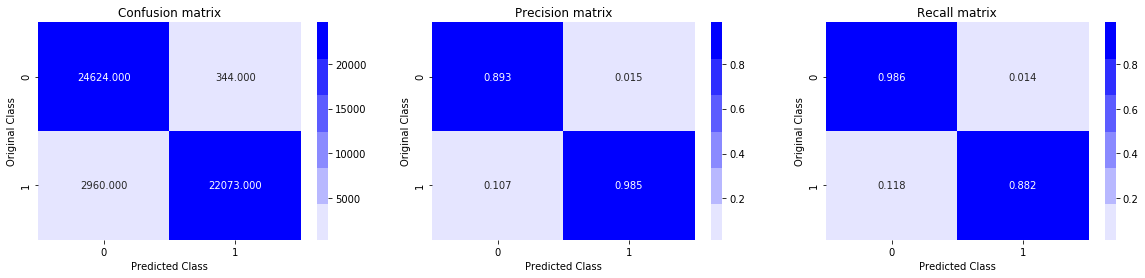

CPU times: user 2.59 s, sys: 530 ms, total: 3.12 s
Wall time: 2.77 s


In [54]:
%%time
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

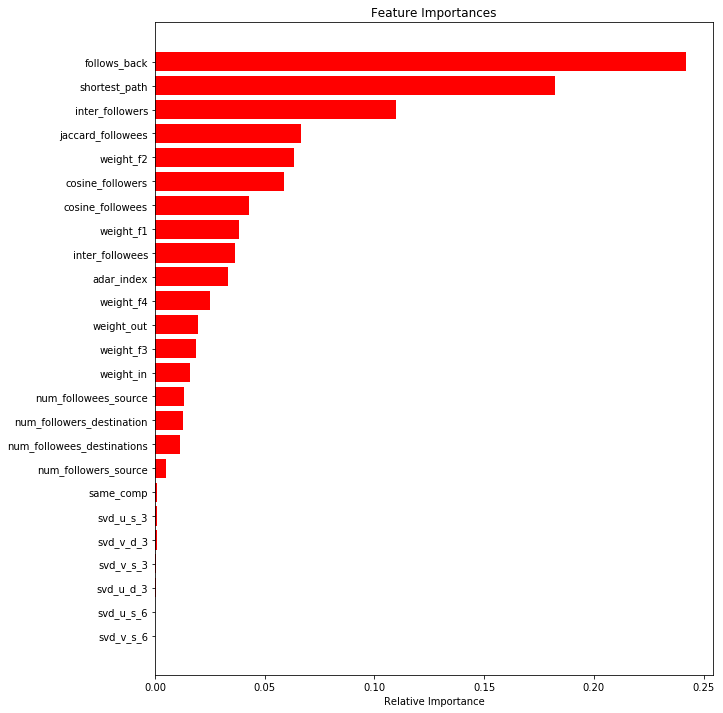

CPU times: user 731 ms, sys: 94.1 ms, total: 825 ms
Wall time: 737 ms


In [55]:
%%time
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()